INFO:__main__:Loading data...
INFO:__main__:Preparing data for Prophet model...
INFO:__main__:Training data shape: (2015, 4)
INFO:__main__:Test data shape: (60, 4)
INFO:__main__:Training Prophet model...
DEBUG:cmdstanpy:input tempfile: /var/folders/d1/9k4sfgrj4r5_v152pb8ny7xc0000gn/T/tmpogxyrddg/6uqxa2si.json
DEBUG:cmdstanpy:input tempfile: /var/folders/d1/9k4sfgrj4r5_v152pb8ny7xc0000gn/T/tmpogxyrddg/h8_xcar5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/pavankakarrot/Documents/retail_forecasting/venv/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38870', 'data', 'file=/var/folders/d1/9k4sfgrj4r5_v152pb8ny7xc0000gn/T/tmpogxyrddg/6uqxa2si.json', 'init=/var/folders/d1/9k4sfgrj4r5_v152pb8ny7xc0000gn/T/tmpogxyrddg/h8_xcar5.json', 'output', 'file=/var/folders/d1/9k4sfgrj4r5_v152pb8ny7xc0000gn/T/tmpogxyrddg/prophet_modelqe5cvikd/prophet_model-20241201171302.csv', 'method=optimize', 'al


Prophet Model Performance Metrics:
--------------------------------------------------
MAE: 4298.9427
RMSE: 5996.7291
R2: -0.0224


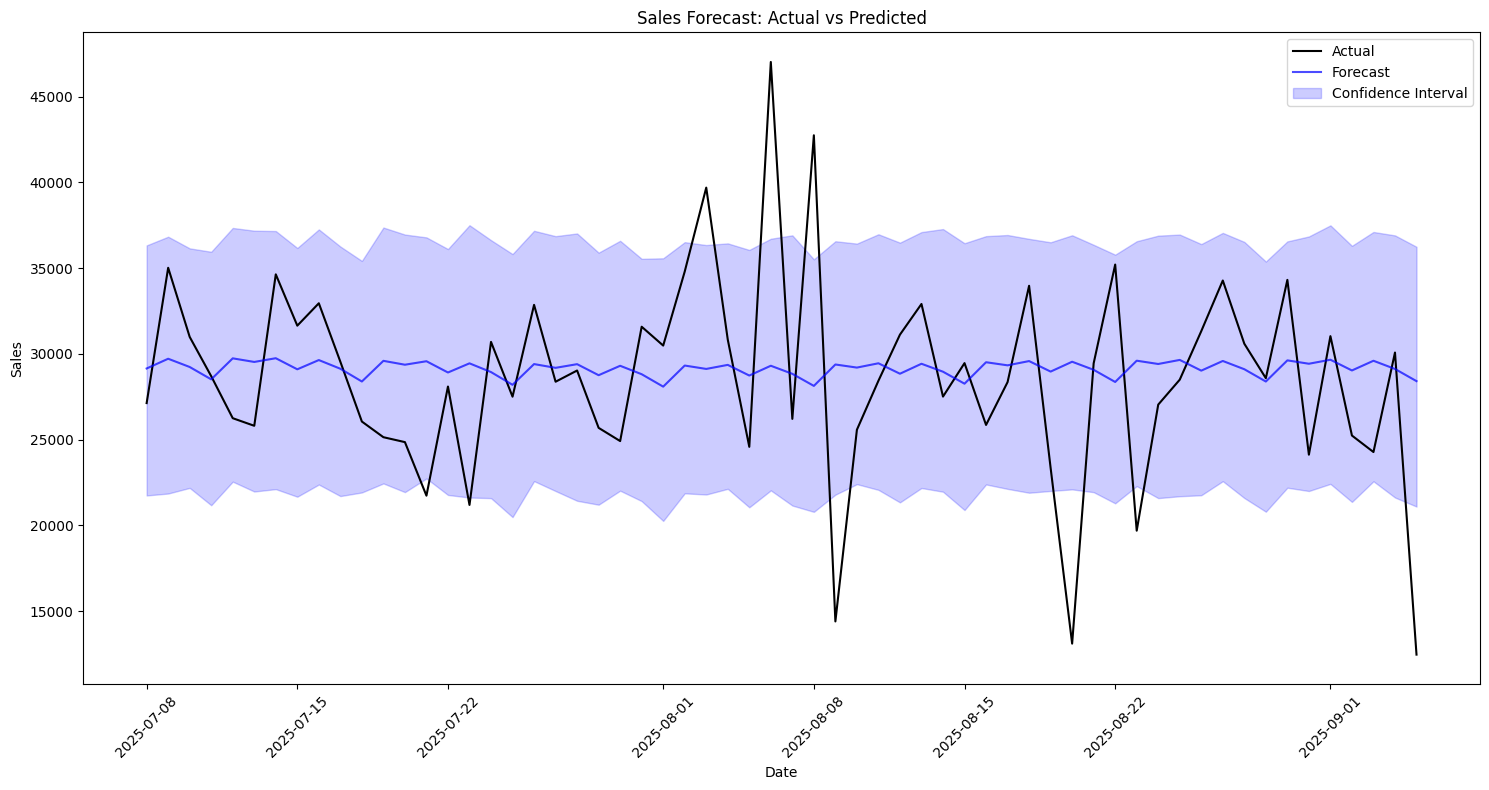

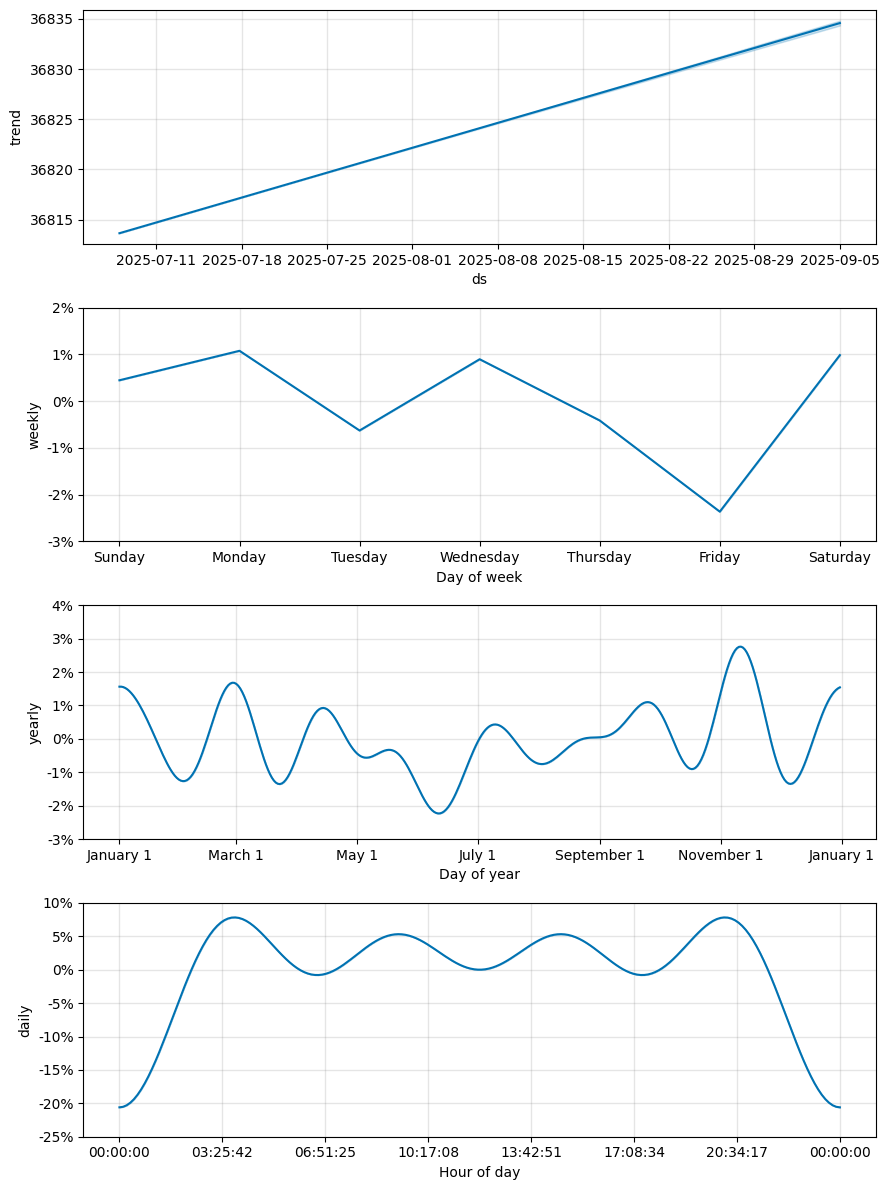

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class ProphetForecastingPipeline:
    """
    A pipeline for time series forecasting using Facebook Prophet.
    Handles data preparation, model training, prediction, and evaluation.
    """
    
    def __init__(self):
        self.model = None
        self.metrics = {}
        self.train_data = None
        self.test_data = None
        
    def prepare_data(self, df, test_size=60):
        """
        Prepare data for Prophet model and create train-test split.
        
        Args:
            df: DataFrame with 'Date' and 'Sales' columns
            test_size: Number of days for testing period
        """
        logger.info("Preparing data for Prophet model...")
        
        # Convert date and rename columns for Prophet
        df['Date'] = pd.to_datetime(df['Date'])
        prophet_df = df.rename(columns={
            'Date': 'ds',
            'Sales': 'y'
        })
        
        # Split data into train and test
        self.train_data = prophet_df.iloc[:-test_size]
        self.test_data = prophet_df.iloc[-test_size:]
        
        logger.info(f"Training data shape: {self.train_data.shape}")
        logger.info(f"Test data shape: {self.test_data.shape}")
        
        return self.train_data, self.test_data
        
    def train_model(self):
        """Train Prophet model with specified parameters."""
        logger.info("Training Prophet model...")
        
        self.model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=True,
            seasonality_mode='multiplicative'
        )
        
        self.model.fit(self.train_data)
        logger.info("Model training completed")
        
    def make_predictions(self):
        """Generate forecasts for the test period."""
        logger.info("Generating predictions...")
        
        predictions = self.model.predict(self.test_data)
        return predictions
        
    def evaluate_model(self, predictions):
        """Calculate and store performance metrics."""
        actual = self.test_data['y']
        predicted = predictions['yhat']
        
        self.metrics = {
            'MAE': mean_absolute_error(actual, predicted),
            'RMSE': np.sqrt(mean_squared_error(actual, predicted)),
            'R2': r2_score(actual, predicted)
        }
        
        logger.info("Model evaluation completed")
        return self.metrics
        
    def plot_results(self, predictions):
        """
        Create visualizations of the forecasting results.
        
        Args:
            predictions: Prophet predictions DataFrame
        """
        # Plot 1: Actual vs Predicted
        plt.figure(figsize=(15, 8))
        plt.plot(self.test_data['ds'], self.test_data['y'], 
                label='Actual', color='black')
        plt.plot(predictions['ds'], predictions['yhat'], 
                label='Forecast', color='blue', alpha=0.7)
        plt.fill_between(predictions['ds'], 
                        predictions['yhat_lower'], 
                        predictions['yhat_upper'], 
                        color='blue', alpha=0.2,
                        label='Confidence Interval')
        plt.title('Sales Forecast: Actual vs Predicted')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Model Components
        self.model.plot_components(predictions)
        plt.tight_layout()
        plt.show()

# Execute the pipeline
if __name__ == "__main__":
    # Load data
    logger.info("Loading data...")
    data_path = '/Users/pavankakarrot/Documents/retail_forecasting/data/processed/target_data_20241201_1647.csv'
    sales_data = pd.read_csv(data_path)
    
    # Initialize pipeline
    prophet_pipeline = ProphetForecastingPipeline()
    
    # Prepare data
    train_data, test_data = prophet_pipeline.prepare_data(sales_data)
    
    # Train model
    prophet_pipeline.train_model()
    
    # Make predictions
    predictions = prophet_pipeline.make_predictions()
    
    # Evaluate model
    metrics = prophet_pipeline.evaluate_model(predictions)
    
    # Print metrics
    print("\nProphet Model Performance Metrics:")
    print("-" * 50)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot results
    prophet_pipeline.plot_results(predictions)

INFO:__main__:Loading data...
INFO:__main__:Preparing data for XGBoost model...
INFO:__main__:Creating lag features...
INFO:__main__:Creating rolling mean features...
INFO:__main__:Training data shape: (1985, 15)
INFO:__main__:Test data shape: (60, 15)
INFO:__main__:Training XGBoost model...


[0]	validation_0-rmse:5732.09065
[100]	validation_0-rmse:2985.71773
[200]	validation_0-rmse:1875.54078
[300]	validation_0-rmse:1152.69275
[400]	validation_0-rmse:703.10599
[500]	validation_0-rmse:442.40088
[600]	validation_0-rmse:280.88834
[700]	validation_0-rmse:179.38454
[800]	validation_0-rmse:112.15040
[900]	validation_0-rmse:69.83290
[999]	validation_0-rmse:44.30373


INFO:__main__:Model training completed
INFO:__main__:Generating predictions...
INFO:__main__:Model evaluation completed



XGBoost Model Performance Metrics:
--------------------------------------------------
MAE: 4488.8972
RMSE: 5878.5985
R2: 0.0174


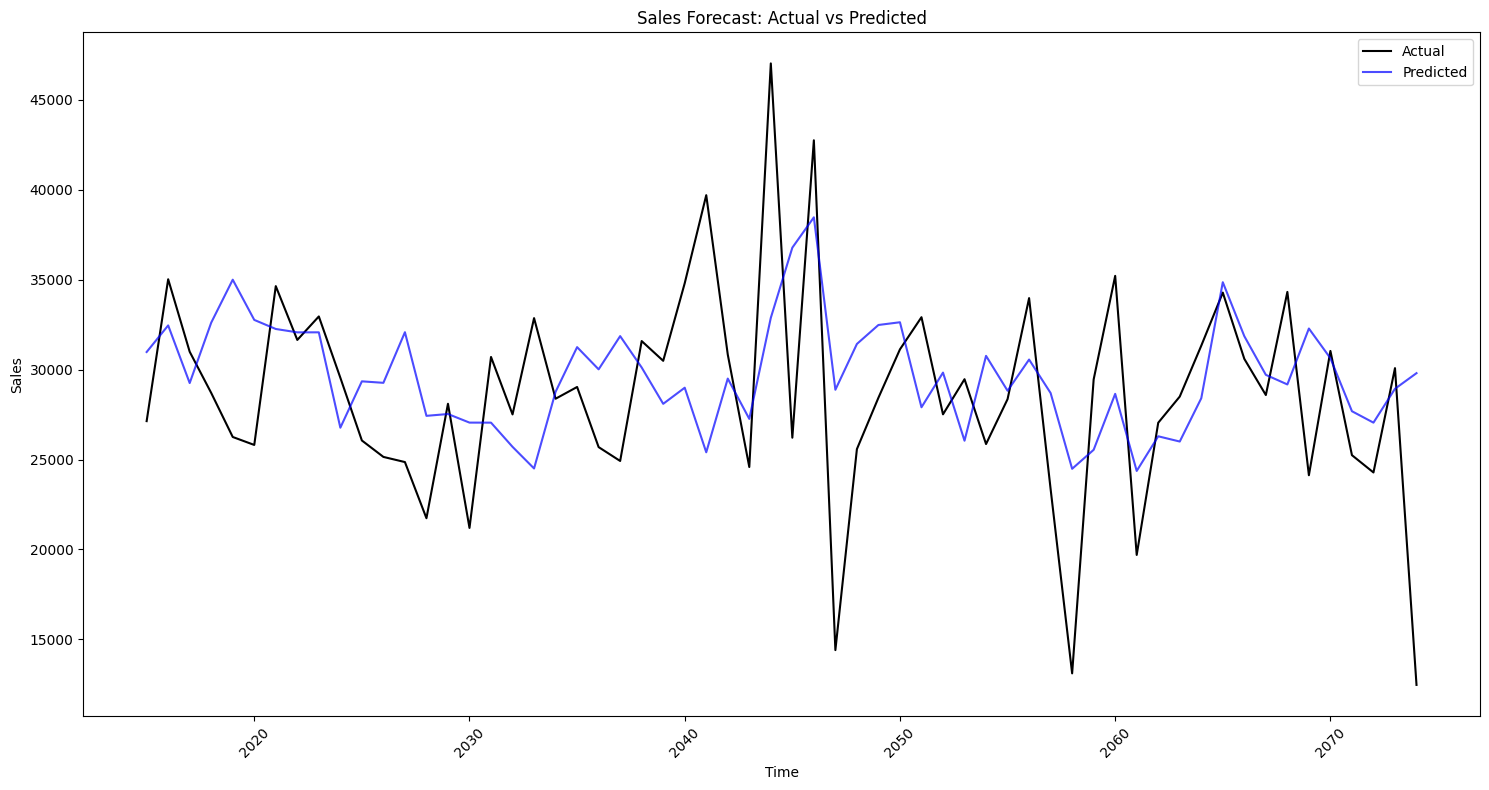

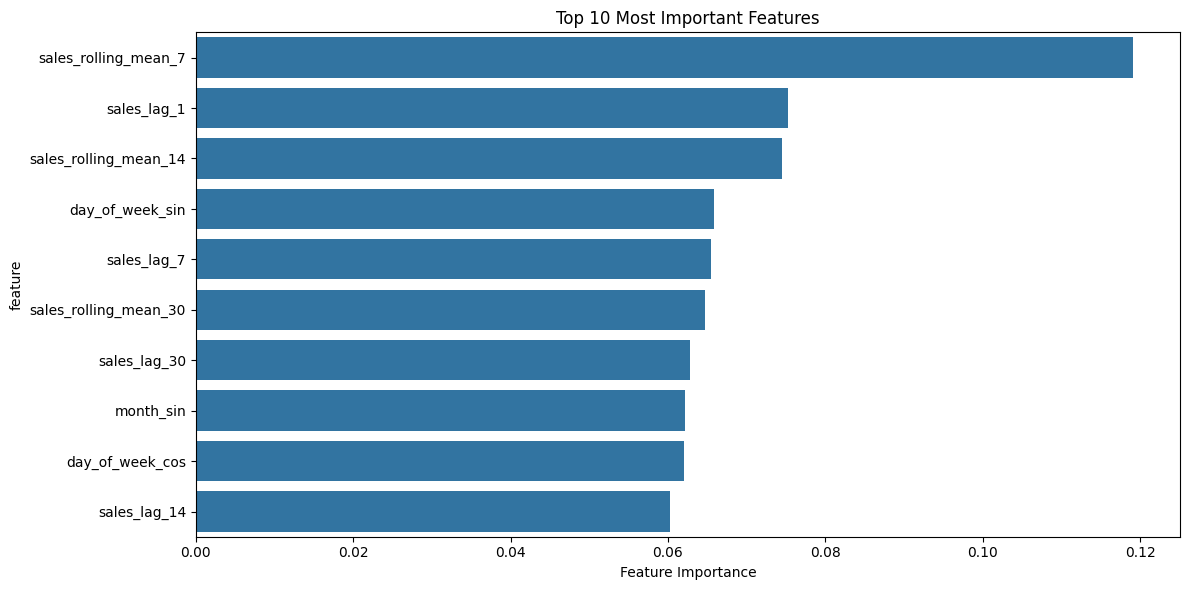

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class XGBoostForecastingPipeline:
    """
    A pipeline for time series forecasting using XGBoost.
    Handles feature engineering, model training, prediction, and evaluation.
    """
    
    def __init__(self):
        self.model = None
        self.metrics = {}
        self.feature_importance = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def prepare_data(self, df, test_size=60):
        """
        Prepare data for XGBoost model including feature engineering and train-test split.
        """
        logger.info("Preparing data for XGBoost model...")
        
        df = df.copy()
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Create lag features
        logger.info("Creating lag features...")
        for lag in [1, 7, 14, 30]:  # Daily, weekly, biweekly, monthly
            df[f'sales_lag_{lag}'] = df['Sales'].shift(lag)
        
        # Create rolling mean features
        logger.info("Creating rolling mean features...")
        for window in [7, 14, 30]:
            df[f'sales_rolling_mean_{window}'] = df['Sales'].rolling(window=window).mean()
        
        # Create date-based features
        df['year'] = df['Date'].dt.year
        df['month'] = df['Date'].dt.month
        df['day_of_week'] = df['Date'].dt.dayofweek
        df['day_of_month'] = df['Date'].dt.day
        
        # Create cyclical features
        df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
        df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
        df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
        df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)
        
        # Drop rows with NaN (due to lag features)
        df = df.dropna()
        
        # Define features
        feature_columns = [col for col in df.columns if col not in ['Date', 'Sales', 'Units', 'Transactions']]
        
        # Split data
        train_data = df.iloc[:-test_size]
        test_data = df.iloc[-test_size:]
        
        self.X_train = train_data[feature_columns]
        self.X_test = test_data[feature_columns]
        self.y_train = train_data['Sales']
        self.y_test = test_data['Sales']
        
        logger.info(f"Training data shape: {self.X_train.shape}")
        logger.info(f"Test data shape: {self.X_test.shape}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
        
    def train_model(self):
        """Train XGBoost model with specified parameters."""
        logger.info("Training XGBoost model...")
        
        self.model = xgb.XGBRegressor(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=7,
            min_child_weight=3,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        
        self.model.fit(
            self.X_train, 
            self.y_train,
            eval_set=[(self.X_train, self.y_train)],
            verbose=100
        )
        
        # Store feature importance
        self.feature_importance = pd.DataFrame({
            'feature': self.X_train.columns,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        logger.info("Model training completed")
        
    def make_predictions(self):
        """Generate predictions for the test period."""
        logger.info("Generating predictions...")
        predictions = self.model.predict(self.X_test)
        return predictions
        
    def evaluate_model(self, predictions):
        """Calculate and store performance metrics."""
        self.metrics = {
            'MAE': mean_absolute_error(self.y_test, predictions),
            'RMSE': np.sqrt(mean_squared_error(self.y_test, predictions)),
            'R2': r2_score(self.y_test, predictions)
        }
        
        logger.info("Model evaluation completed")
        return self.metrics
        
    def plot_results(self, predictions):
        """Create visualizations of the forecasting results and feature importance."""
        # Plot 1: Actual vs Predicted
        plt.figure(figsize=(15, 8))
        plt.plot(self.y_test.index, self.y_test, label='Actual', color='black')
        plt.plot(self.y_test.index, predictions, label='Predicted', color='blue', alpha=0.7)
        plt.title('Sales Forecast: Actual vs Predicted')
        plt.xlabel('Time')
        plt.ylabel('Sales')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Feature Importance
        plt.figure(figsize=(12, 6))
        sns.barplot(
            x='importance',
            y='feature',
            data=self.feature_importance.head(10)
        )
        plt.title('Top 10 Most Important Features')
        plt.xlabel('Feature Importance')
        plt.tight_layout()
        plt.show()

# Execute the pipeline
if __name__ == "__main__":
    # Load data
    logger.info("Loading data...")
    data_path = '/Users/pavankakarrot/Documents/retail_forecasting/data/processed/target_data_20241201_1647.csv'
    sales_data = pd.read_csv(data_path)
    
    # Initialize pipeline
    xgboost_pipeline = XGBoostForecastingPipeline()
    
    # Prepare data
    X_train, X_test, y_train, y_test = xgboost_pipeline.prepare_data(sales_data)
    
    # Train model
    xgboost_pipeline.train_model()
    
    # Make predictions
    predictions = xgboost_pipeline.make_predictions()
    
    # Evaluate model
    metrics = xgboost_pipeline.evaluate_model(predictions)
    
    # Print metrics
    print("\nXGBoost Model Performance Metrics:")
    print("-" * 50)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot results
    xgboost_pipeline.plot_results(predictions)